In [121]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")
#train_data.head()

In [123]:
#Normalization / conditioning
"""
X_trn = scale(train_data.drop(['target'],axis=1))
X_tst = scale(test_data.drop(['target'],axis=1))

Y_trn = np.ravel(train_data['target'])
Y_tst = np.ravel(test_data['target'])
"""

"\nX_trn = scale(train_data.drop(['target'],axis=1))\nX_tst = scale(test_data.drop(['target'],axis=1))\n\nY_trn = np.ravel(train_data['target'])\nY_tst = np.ravel(test_data['target'])\n"

In [124]:

Standard = StandardScaler()

X_trn = Standard.fit_transform(train_data.drop(['target'],axis =1 ))
X_tst = Standard.transform(test_data.drop(['target'],axis =1 ))

Y_trn = np.ravel(train_data['target'])
Y_tst = np.ravel(test_data['target'])


# Fittig the training data first

In [125]:
from sklearn import svm

clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(X_trn,Y_trn)



SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [126]:
#predicting
Y_trn_predict = clf.predict(X_trn)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Training data : Accuracy 82.133%'}, xlabel='Predicted class', ylabel='True class'>)

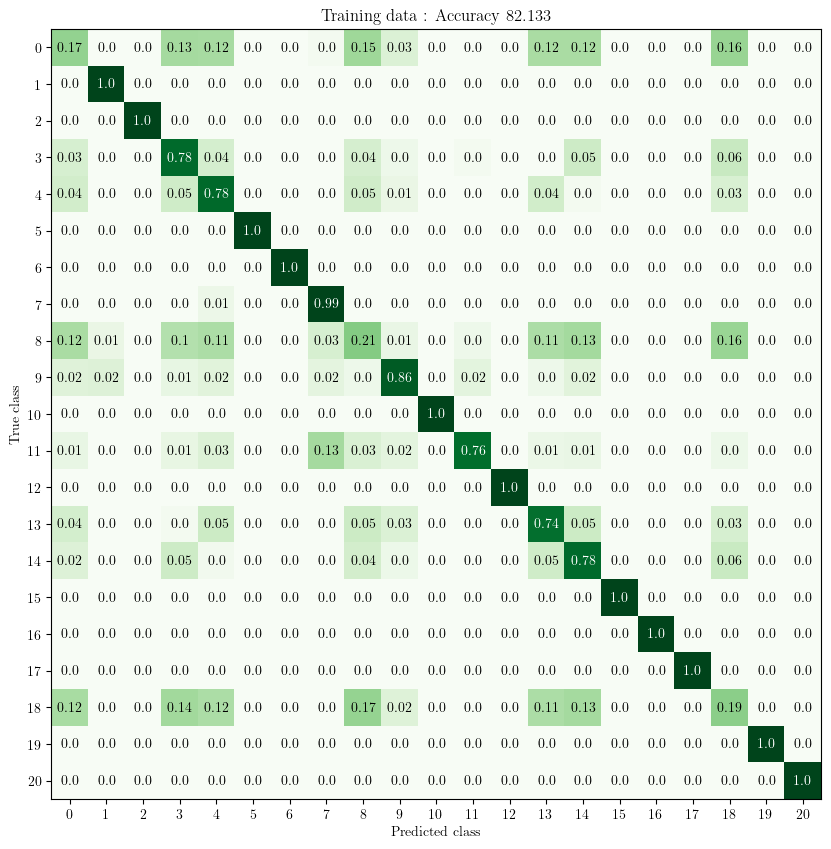

In [127]:

conf_matrix = np.zeros([21, 21])

for x,y in zip(Y_trn,Y_trn_predict):
    conf_matrix[int(x)][int(y)] +=1

    #Generate confusion matrix pdf
confusion_matrix.confusion_matrix(conf_matrix, figsize = (10,10), save_fig_name = 'SVM_train.pdf', title = 'Training data',eval_labels = False)



# Testing on validation data

In [128]:
Y_tst_predict = clf.predict(X_tst)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Validation data : Accuracy 68.301%'}, xlabel='Predicted class', ylabel='True class'>)

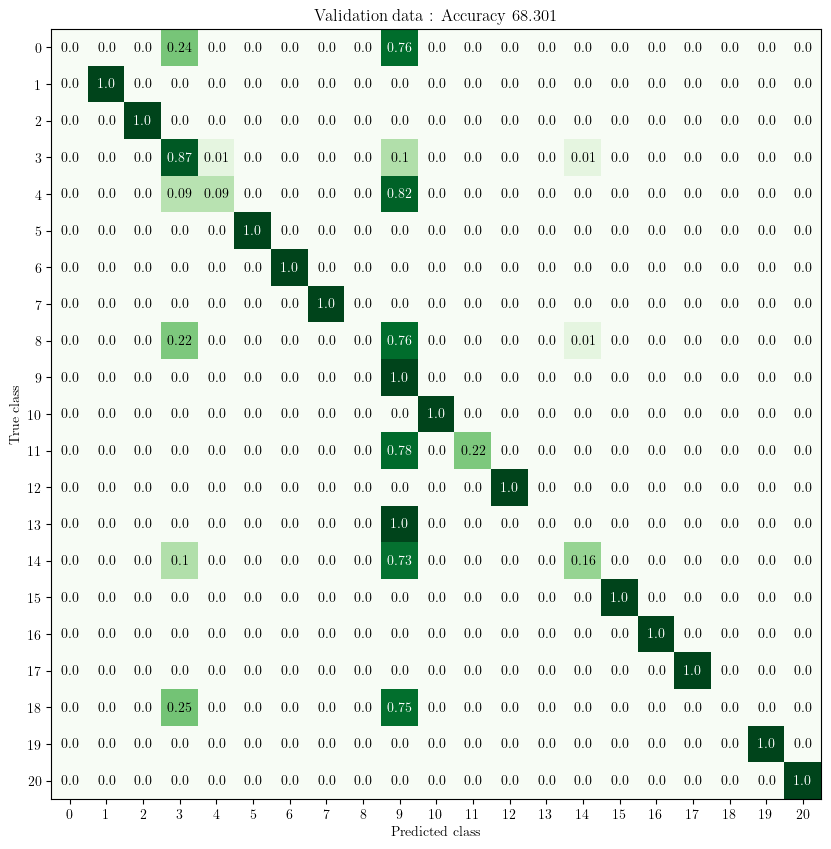

In [129]:
conf_matrix = np.zeros([21, 21])

for x,y in zip(Y_tst,Y_tst_predict):
    conf_matrix[int(x)][int(y)] +=1

    #Generate confusion matrix pdf
confusion_matrix.confusion_matrix(conf_matrix, figsize = (10,10), save_fig_name = 'SVM_val.pdf', title = 'Validation data',eval_labels = False)

With standardlization:

Traning: Accuracy = 82 %, False positive = 83 %
Validation: Accuracy = 68 %, False positive = 100 %

Without standardlization:

Traning: Accuracy = 90 %, False positive = 13 %
Validation: Accuracy = 36 %, False positive = 100 %